In [1]:
#!/usr/bin/env python

In [2]:
import os
import sys
if os.path.exists('/home/chieh/code/wPlotLib'):
	sys.path.insert(0,'/home/chieh/code/wPlotLib')
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')

In [3]:
import wuml
import numpy as np
#import torch
import wplotlib

The original network was trained by basicRegression.py<br>
here we load the trained network and use it<br>
   ---------------------------------------------------------

In [4]:
net = wuml.load_torch_network('./basicRegressionNet.pk')
data = wuml.wData(xpath='../../data/regress.csv', ypath='../../data/regress_label.csv', batch_size=20, label_type='continuous')
Ŷ = net(data)

Check out our predictions

In [5]:
SR = wuml.summarize_regression_result(data.Y, Ŷ)
SR.true_vs_predict(print_out=True)

,y,ŷ,Δy
0,1.1,1.107,0.007
1,1.1,1.600,0.500
2,2.2,1.600,0.600
3,1.0,2.208,1.208
4,2.0,2.208,0.208
5,3.0,2.208,0.792
6,2.0,2.857,0.857
7,3.0,2.857,0.143
8,4.0,2.857,1.143


,y,ŷ,Δy
0,1.1,1.107,0.007
1,1.1,1.600,0.500
2,2.2,1.600,0.600
3,1.0,2.208,1.208
4,2.0,2.208,0.208
5,3.0,2.208,0.792
6,2.0,2.857,0.857
7,3.0,2.857,0.143
8,4.0,2.857,1.143


     y      ŷ     Δy
0  1.1  1.107  0.007
1  1.1  1.600  0.500
2  2.2  1.600  0.600
3  1.0  2.208  1.208
4  2.0  2.208  0.208
5  3.0  2.208  0.792
6  2.0  2.857  0.857
7  3.0  2.857  0.143
8  4.0  2.857  1.143

Draw the regression line

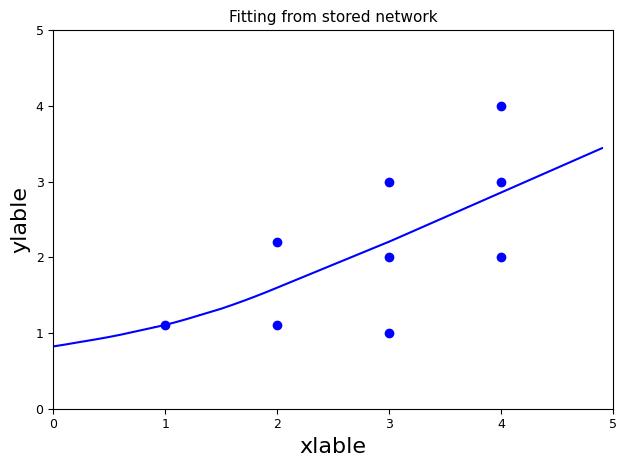

In [6]:
newX = np.expand_dims(np.arange(0,5,0.1),1)
Ŷline = net(newX, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor
splot = wplotlib.scatter(data.X, data.Y, marker='o', show=False)
lp = wplotlib.lines(newX, Ŷline, title_font=11, title='Fitting from stored network', xlim=[0,5], ylim=[0,5], show=True)	

   ---------------------------------------------------------

The original network was trained by complexNet.py<br>
here we load the trained network and use it<br>
   ---------------------------------------------------------

In [7]:
data = wuml.wData(xpath='../../data/wine.csv', ypath='../../data/wine_label.csv', 
					extra_data='../../data/wine_regress_label.csv', 
					preprocess_data='center and scale', 
					 batch_size=16, label_type='discrete')
Y2 = data.extra_data_dictionary['numpy'][0]

In [8]:
net = wuml.load_torch_network('./ComplexNet.pk')
[labels, ŷᵦ] = net(data)

output results

In [9]:
CR = wuml.summarize_classification_result(data.Y, labels)
SR = wuml.summarize_regression_result(Y2, ŷᵦ)
#    ---------------------------------------------------------

,y,ŷ,Δy
0,0.0,1.0,1.0
1,0.0,1.0,1.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,1.0,1.0
7,0.0,0.0,0.0
8,0.0,1.0,1.0
9,0.0,1.0,1.0


,y,ŷ,Δy
0,-0.970,-0.846000,0.124
1,-16.928,-14.327000,2.601
2,13.649,3.315000,10.334
3,4.961,4.098000,0.863
4,25.405,8.366000,17.039
...,...,...,...
173,35.462,17.157000,18.305
174,21.143,13.742000,7.401
175,13.592,14.402000,0.810
176,3.000,12.165000,9.165


The original network was trained by autoencoder.py<br>
here we load the trained network and use it<br>
   ---------------------------------------------------------

In [10]:
data = wuml.wData(xpath='../../data/wine.csv', ypath='../../data/wine_label.csv', 
					preprocess_data='center and scale', batch_size=128, label_type='discrete')

In [11]:
AE = wuml.load_torch_network('./autoencoder.pk')
#	This is the objective network output 
ẙ = AE.objective_network(data)

Here we use the objective network output to perform LogisticRegression classification

In [12]:
cf = wuml.classification(ẙ, classifier='LogisticRegression')
wuml.jupyter_print(cf.result_summary(print_out=False))

,classifier,Train,Test
,LogisticRegression,1.0,1.0


   ---------------------------------------------------------